In [1]:
# Importing essential libraries for Exploratory Data Analysis (EDA):
# pandas for data manipulation and analysis.
# matplotlib for creating static visualizations.
# seaborn for advanced statistical visualizations with built-in themes and color palettes.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Realistic_Solar_PV_Fault_100k.csv")

In [3]:
# Dropping features that contributed less than 5% importance as determined by the feature importance analysis.
# Removing the target variable 'Fault_Flag' and other low-importance features to retain only the most significant predictors.
drop_cols = ["Fault_Flag", "Longitude", "Latitude", "Panel_Tilt (degrees)", 
             "Panel_Orientation (degrees)", 
             "Solar_Elevation (degrees)", "Sun_Azimuth (degrees)", 
             "DHI (W/m²)"]
features = df.drop(columns=drop_cols)

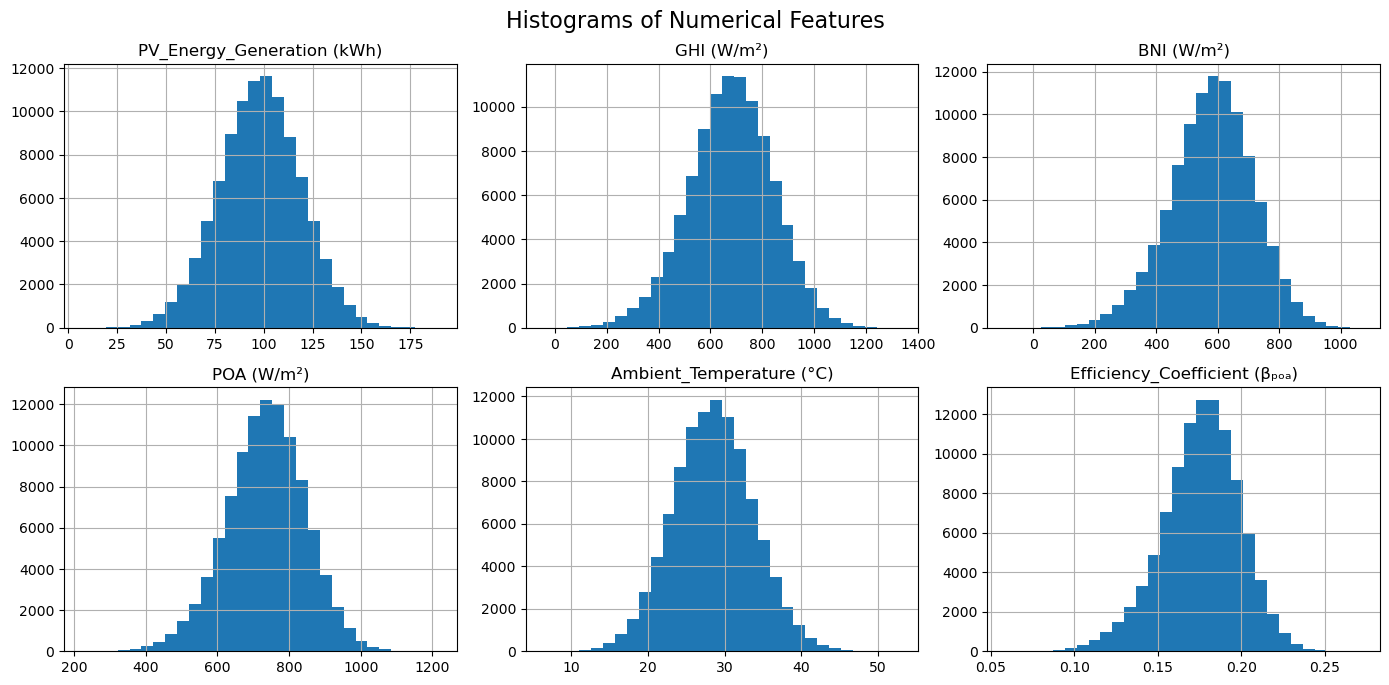

In [4]:
# Plotting histograms for all the selected numerical features to visualize their distributions.
# Using 30 bins for each histogram and arranging the plots in a 3x3 grid layout.
# Adding a main title and adjusting layout for better spacing and readability.
features.hist(bins=30, figsize=(14, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

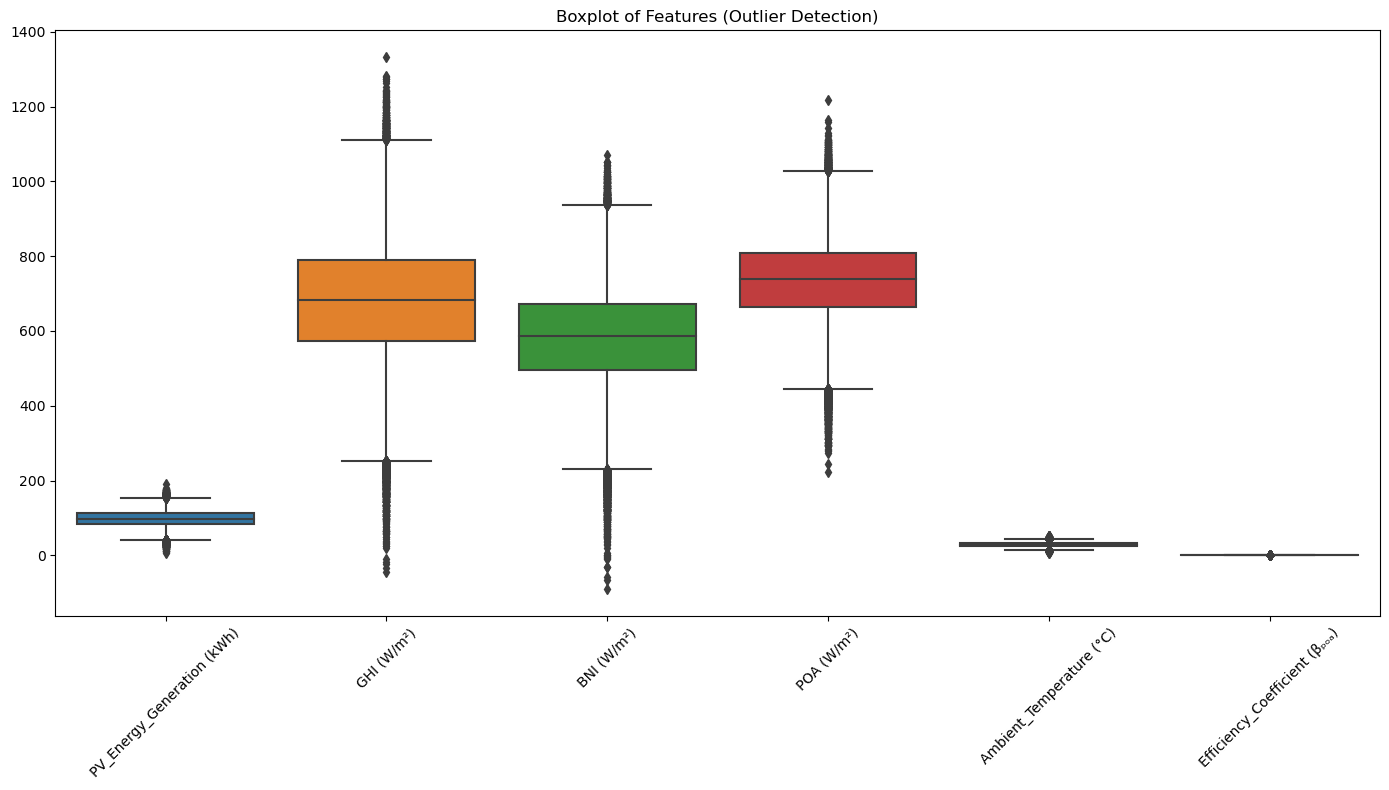

In [5]:
# Plotting boxplots for all selected features to visually detect outliers and understand feature spread.
# Setting figure size for clarity and rotating x-axis labels for better readability.
plt.figure(figsize=(14, 8))
sns.boxplot(data=features)
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Outlier Detection)")
plt.tight_layout()
plt.show()

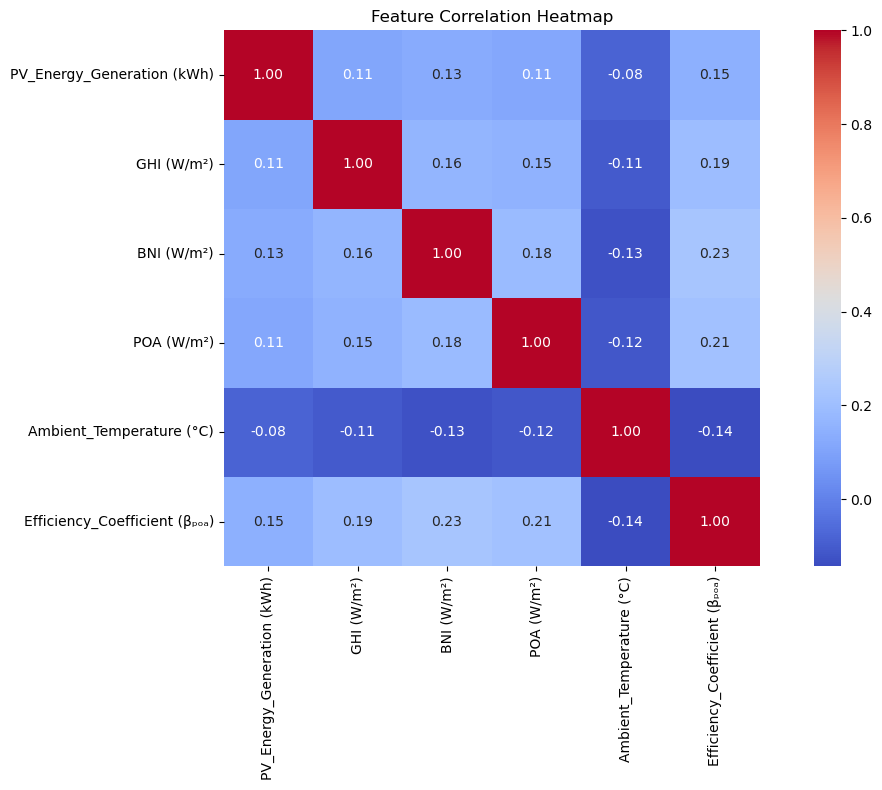

In [6]:
# Plotting a correlation heatmap to visualize the pairwise correlation between the selected features.
# Using the 'coolwarm' color map to easily distinguish positive and negative correlations.
# Annotating correlation values inside each cell and adjusting the figure for better layout and readability.
plt.figure(figsize=(12, 8))
corr = features.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

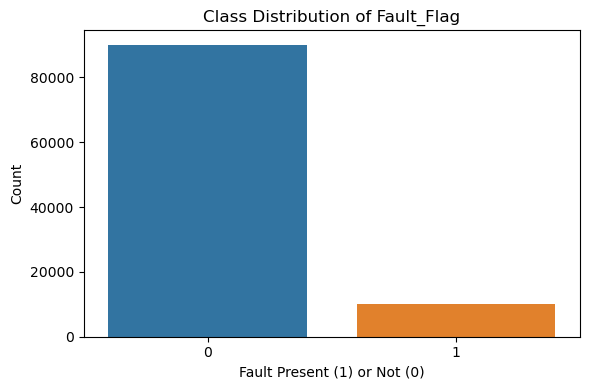

In [7]:
# Plotting the class distribution of the target variable 'Fault_Flag' to check for class imbalance.
# Using a countplot to display the number of samples for each class: Fault Present (1) or Not (0).
plt.figure(figsize=(6, 4))
sns.countplot(x="Fault_Flag", data=df)
plt.title("Class Distribution of Fault_Flag")
plt.xlabel("Fault Present (1) or Not (0)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [8]:
# Calculating the percentage distribution of each class in the 'Fault_Flag' column to quantitatively assess class balance.
# The value_counts(normalize=True) function returns the proportion of each class.
# Multiplying by 100 and rounding to two decimal places to display class percentages clearly.
class_counts = df["Fault_Flag"].value_counts(normalize=True)
print("Class Balance (in %):")
print((class_counts * 100).round(2))

Class Balance (in %):
Fault_Flag
0    90.0
1    10.0
Name: proportion, dtype: float64
